# Exploratory Data Analysis of Deep Cooperative Multi-Agent Reinforcement Learning Empirical Algorithm Performance Evaluation Methods
### Roland Dubb
### February 2023

This code provides an exploratory data analysis (EDA) of the empirical algorithm performance evaluation methodologies found in recent literature on deep cooperative multi-agent reinforcement learning (MARL). 

The EDA here provides the plots contained in section 2.3 of my master of science dissertation, supervised by Assoc. Prof. Jonathan Shock in his lab, Shocklab, in the Department of Mathematics and Applied Mathematics at the University of Cape Town. The dissertation is titled: 

**Addressing Multi-Agent Reinforcement Learning Algorithm Performance Evaluation**

The data on MARL evaluation methodologies is collected from a selection of the majority of published deep cooperative MARL publications between 2016- April 2022. The data was collected to assess the evaluation methods in deep cooperative MARL and assess the level of rigour to determine if there is a need for a standardised evaluation protocol.

The data set can be found at https://marl-dataset.notion.site/marl-dataset/MARL-dataset-d632230523a74f2793630504ab4542e5 or https://drive.google.com/file/d/1XZXIEQU1zgq8nhROVukWnriCBRdUMtdO/view?usp=sharing. The dataset forms part of the supplementary material of the paper below:

**Towards a Standardised Performance Evaluation Protocol for Cooperative MARL** 

R. Gorsane, O. Mahjoub, R. J. de Kock, R. Dubb, S. Singh, and A. Pretorius, “Towards a Standardised Per-
formance Evaluation Protocol for Cooperative MARL,” in Thirty-Sixth Conference on Neural Information
Processing Systems, 2022. [Online]. Available: https://openreview.net/forum?id=am86qcwErJm

This paper accompanies my dissertation and contains its own data analysis which can be found at https://colab.research.google.com/drive/1mlI6rODvIX4gE3O8HWp_J_gWS9nnzAj4?usp=sharing. The analysis here contains some of the analysis found in the paper.

## Load the Data Set

In [ ]:
# 1. Manually download the data csv file form the provided link.
# The csv file is contained in https://drive.google.com/file/d/1XZXIEQU1zgq8nhROVukWnriCBRdUMtdO/view?usp=sharing

# From your local drive select the csv titled coop_published_papers.csv and upload it to be accessed in the notebook.
from google.colab import files
uploaded_file = files.upload()

Saving coop_published_papers.csv to coop_published_papers.csv


In [ ]:
#Load the dataset
import pandas as pd
df=pd.read_csv("coop_published_papers.csv")

## A first look at the data (a look at the main columns)


In [ ]:
# Rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Column names:", df.columns)
# number of papers
unique_titles = df['paper_title'].nunique()
print("Number of unique research papers:", unique_titles)

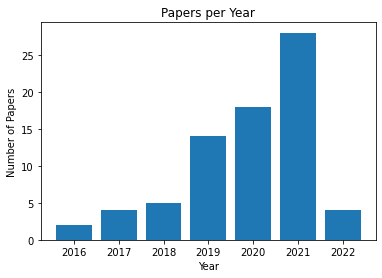

In [ ]:
# papers by year
import matplotlib.pyplot as plt
papers_per_year = df.groupby('year')['paper_title'].nunique()
plt.bar(papers_per_year.index, papers_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Papers per Year')
plt.show()

In [ ]:
# number of papers per environment
#More than 2 uses
env_counts = df.groupby('enviroment_class')['paper_title'].nunique()
env_counts = env_counts.sort_values(ascending=False)
filtered_counts = env_counts[env_counts >= 2]
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax,color=colors)
plt.title('Papers per Env')
plt.xlabel('Environment')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# number of papers per algorithm
# More than 5 uses
algo_counts = df.groupby('algorithm')['paper_title'].nunique()
algo_counts = algo_counts.sort_values(ascending=False)
filtered_counts = algo_counts[algo_counts >= 5]
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax,color=colors)
plt.title('Papers per Alg')
plt.xlabel('Alg')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# looking at the metrics used
metric_counts = df.groupby('metric')['paper_title'].nunique()
metric_counts = metric_counts.sort_values(ascending=False)
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
filtered_counts = metric_counts[metric_counts >= 1]
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax, color=colors)
plt.title('Papers per Metric')
plt.xlabel('Metric')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# looking at the "general metrics" used
gen_metric_counts = df.groupby('general_metric')['paper_title'].nunique()
gen_metric_counts = gen_metric_counts.sort_values(ascending=False)
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax, color=colors)
plt.title('Papers per General Metric')
plt.xlabel('Gen Metric')
plt.ylabel('Number of Papers')
plt.show()

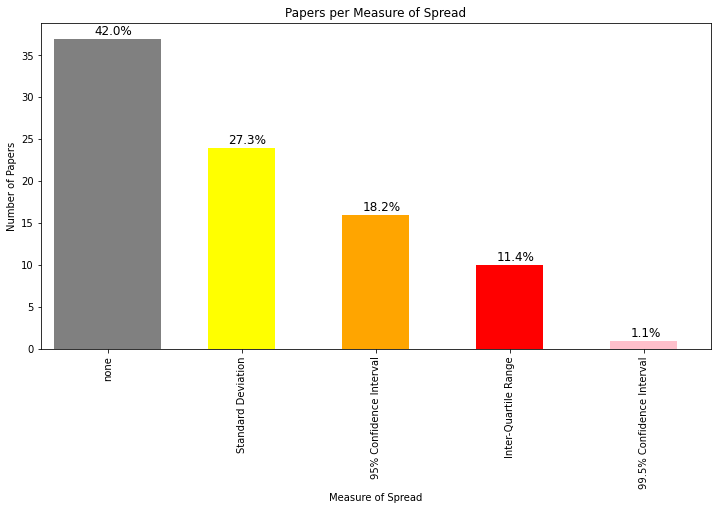

In [ ]:
# Looking at the measures of spread used
import numpy as np
mos_counts = df.groupby('measure_of_spread')['paper_title'].nunique()
papers_with_no_mos = df[df['measure_of_spread'].isnull()]['paper_title'].nunique()
mos_counts['none'] = papers_with_no_mos
mos_counts = mos_counts.sort_values(ascending=False)
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
filtered_counts = mos_counts[mos_counts >= 1]
percentages = (filtered_counts / filtered_counts.sum() * 100).round(1)
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax, color=colors)
if papers_with_no_mos > 0:
    ax.bar('none', papers_with_no_mos, color='gray', label='none')
for i, v in enumerate(filtered_counts):
    ax.text(i - 0.1, v + 0.5, str(percentages.iloc[i]) + '%', fontsize=12)

plt.title('Papers per Measure of Spread')
plt.xlabel('Measure of Spread')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# Which papers have CIs
ci_counts = df.groupby('confidence_interval')['paper_title'].nunique()
ci_counts = ci_counts.sort_values(ascending=False)
colors = ['blue', 'yellow', 'orange', 'red', 'pink','green']
filtered_counts = ci_counts[ci_counts >= 2]
fig, ax = plt.subplots(figsize=(12, 6))
filtered_counts.plot(kind='bar', ax=ax, color=colors)
plt.title('Papers with and without CIs')
plt.xlabel('CI?')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# aggregate function used to aggrgete across individual data at the fine grained level
agg_counts = df.groupby('aggregate_function')['paper_title'].nunique()
agg_counts = agg_counts.sort_values(ascending=False)
agg_counts.plot(kind='bar', color='b')
plt.title('Papers per Aggregate Function (fine grained agg)')
plt.xlabel('Aggregate Function')
plt.ylabel('Number of Papers')
total = sum(agg_counts)
for i in range(len(agg_counts)):
    count = agg_counts[i]
    percentage = round(count/total*100, 1)
    plt.text(i, count+1, f"{percentage}%", ha='center')
    
plt.show()

In [ ]:
# number of random seeds used
seeds_counts = df.groupby('number_seeds')['paper_title'].nunique()
seeds_counts.plot(kind='bar', color='b')
plt.title('Number of Random Seeds Used')
plt.xlabel('Random Seeds')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# runs per seed
runs_counts = df.groupby('runs_per_seed')['paper_title'].nunique()
runs_counts.plot(kind='bar', color='b')
plt.title('Number of Runs per Seed')
plt.xlabel('Runs per Seed')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# evaluation frequency
eval_counts = df.groupby('evaluation_frequency_value')['paper_title'].nunique()
eval_counts = eval_counts[eval_counts > 3]
eval_counts.plot(kind='bar', color='b')
plt.title('Evaluation Frequency')
plt.xlabel('Evaluation Frequency')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
# evaluation duration
duration_counts = df.groupby('evaluation_duration')['paper_title'].nunique()
duration_counts.plot(kind='bar', color='b')
plt.title('Evaluation Duration')
plt.xlabel('Evaluation Duration')
plt.ylabel('Number Papers')
plt.show()

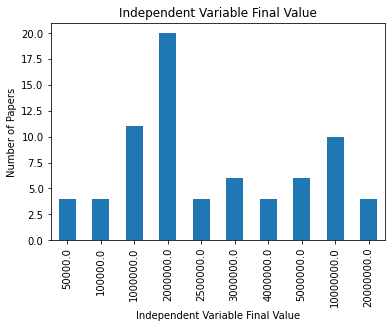

In [ ]:
# independent variable final value
import matplotlib.ticker as mtick
iv_counts = df.groupby('independent_variable_final_value')['paper_title'].nunique()
iv_counts = iv_counts[iv_counts >= 4]
ax = iv_counts.plot(kind='bar')
ax.set_title('Independent Variable Final Value')
ax.set_xlabel('Independent Variable Final Value')
ax.set_ylabel('Number of Papers')
plt.show()

## Data Analysis

### Inconsistent Results Across Papers

In [ ]:
# Plotting style imports
import seaborn as sns
import colorcet as cc
# Plotting style
sns.set_style("ticks")
sns.set_context("poster")
palette = sns.color_palette("Set2",8)
sns.set_palette(palette)

In [ ]:
# method adapted from the code from Gorsane et. al.
def env_alg_metric_performance_dists(alg,env,metric,num=7,fs1=15,fs2=8):
  '''Plots several boxplots, one for each task on the provided env. Boxplots show, for the given algorithm, what the spread of its performance is across papers for the given metric. The boxplots each contain a minimum of num datapoints.'''
  # select only the data with the corect env
  data = df.loc[df['enviroment_class']==env, ['enviroment_class','environment','metric_value', 'algorithm','metric']]
  #select only the data with the correct algorithm
  data = data.loc[df['algorithm']==alg, ['environment','metric_value', 'algorithm','metric']]
  #  select only the data with the correct metric
  data = data.loc[df['metric']==metric, ['environment','metric_value','metric']]
  #remove the metric column
  data =  data.iloc[:,0:2]
  datapoint_counts = data['environment'].value_counts()
  #exclude tasks with less than num datapoints
  datapoint_counts = datapoint_counts[datapoint_counts>num]
  datapoint_counts = datapoint_counts.to_dict()
  #get the names of the tasks that we want to make boxplots for
  tasks = list(datapoint_counts.keys())
  #select only the data where the tasks are in the list
  data = data[data['environment'].isin(tasks)]
  #make the boxplots
  plt.figure(figsize=(fs1,fs2))
  p=sns.boxplot(x='environment', y='metric_value',data=data, boxprops=dict(alpha=.6))
  p=sns.stripplot(x='environment', y='metric_value',data=data,size=12)
  plt.setp(p.get_xticklabels(), rotation=90)
  plt.title('Boxplots of '+alg+'\'s Reported '+ metric +' on ' + env + ' Tasks')
  plt.xlabel(env+ ' Tasks');
  plt.ylabel(metric);
  plt.tick_params(axis='both', which='major')
  plt.show()

In [ ]:
env_alg_metric_performance_dists('QMIX', 'SMAC', 'Win Rate')

In [ ]:
env_alg_metric_performance_dists('VDN', 'SMAC', 'Win Rate')

In [ ]:
#Try others
env_alg_metric_performance_dists('IQL', 'SMAC', 'Win Rate',fs1=6)
env_alg_metric_performance_dists('QMIX', 'MPE', 'Mean Returns',2,fs1=5)
env_alg_metric_performance_dists('VDN', 'MPE', 'Mean Returns',2,fs1=5)

### Environment Overfitting

In [ ]:
# Use of different MARL envs
# Code adapted from Gorsane et. al.
env_data=(df.groupby(['paper_title'])['enviroment_class']
                     .value_counts()
                     .rename('env_count')
                     .reset_index())
#Remove an environment if it was used only once
l=[]
for index in env_data.index:
    k=env_data[env_data['enviroment_class']==env_data['enviroment_class'][index]]
    if len(k)<=1:
        l.append(env_data['enviroment_class'][index])
env_data=env_data[~env_data['enviroment_class'].isin(l) ]

# Shorten names
for i in env_data.index:
    if env_data.enviroment_class[i]=='StarCraft unit micromanagement':
       env_data.enviroment_class[i]='starcraft unit'+'\n'+'micromanagement'


# make plot
plt.figure(figsize=(15,8))
p=sns.countplot(x='enviroment_class', data=env_data, alpha=0.9)
plt.title('Environment Popularity')
plt.xlabel('Environment');
plt.setp(p.get_xticklabels(), rotation=90)
plt.ylabel('Number of papers');
plt.tick_params(axis='both', which='major')

In [ ]:
# Number of tasks used per paper.
# Code adapted from Gorsane et. al.
def number_of_used_tasks():
  '''This method produced a bar plot that depicts the popularity of using various numbers of tasks per paper.'''
  o=(df.groupby(['paper_title'])['environment'].value_counts()
                      .rename('Number of used environment')
                      .reset_index()
                      .sort_values('paper_title'))
  for i in o.index:
      k=o[o['paper_title']==o['paper_title'][i]]
      o['Number of used environment'][i]=len(k.environment.unique())
  o=(o.groupby(['paper_title'])['Number of used environment']
                      .value_counts()
                      .rename('cal')
                      .reset_index()
                      .sort_values('paper_title'))
  plt.figure(figsize=(15,8))
  o['hue']='yes'
  p=sns.countplot(x='Number of used environment',hue='hue', data=o)
  total=len(o.paper_title.unique())
  plt.xlabel('Number of tasks');
  plt.title('Number of Tasks Used Per Paper')
  plt.legend([],[], frameon=False)
  plt.ylabel('Number of papers');
  plt.tick_params(axis='both', which='major');

In [ ]:
number_of_used_tasks()

In [ ]:
# SMAC problem with subsampling a few tasks - ranking changes
# code adapted from Gorsane et. al.
def comparing_algs_smac(algs, tasks):
  '''This method plots the reported performances of three algorithms on three SMAC tasks to demonstrate the change in rankings across the tasks.'''
  o=df[df['enviroment_class']=='SMAC']
  o=o[o['general_metric']=='Win Rate']
  o=o[o['algorithm'].isin(algs)]

  #Data cleaning because corridor and Corridor in the dataset are the same task
  for i in o.index:
          if o.environment[i]=='corridor':
              o.environment[i]='Corridor'

  # make plot
  plt.figure(figsize=(15,8))
  palette = sns.color_palette(cc.glasbey_category10, n_colors=20)
  sns.set_palette(palette)
  #pointplot provides estimate of central tendency for a set of data and also some error bar, default is 95% CI.
  p=sns.pointplot(x='environment',hue='algorithm', y='metric_value',data=o[o['environment'].isin(tasks)], linestyles = '-.',palette=palette)
  plt.title('Comparison of Algorithm Performance Across SMAC Tasks')
  plt.xlabel('SMAC Tasks');
  plt.ylabel('Win rate (%)');
  plt.tick_params(axis='both', which='major')
  plt.show()

In [ ]:
comparing_algs_smac(algs=['VDN','MAPPO','QMIX','IQL'], tasks=['Corridor', 'MMM2','3s5z'])

In [ ]:
comparing_algs_smac(algs=['VDN','IQL','COMA','IA2C','QMIX','MAPPO','MADDPG'], tasks=['2s3z', 'MMM2','5m_vs_6m'])

In [ ]:
comparing_algs_smac(algs=['MAPPO','MADDPG','COMA'], tasks=['Corridor', 'MMM2','3s5z'])

In [ ]:
# # MPE problem with subsampling a few tasks - ranking changes
# # code adapted from Gorsane et. al.
# def comparing_algs_MPE(algs, tasks):
#   '''This method plots the reported performances of three algorithms on three MPE tasks to demonstrate the change in rankings across the tasks.'''
#   o=df[df['enviroment_class']=='MPE']
#   o=o[o['general_metric']=='Mean Returns']
#   o=o[o['algorithm'].isin(algs)]
#
#   # make plot
#   plt.figure(figsize=(15,8))
#   palette = sns.color_palette(cc.glasbey_category10, n_colors=20)
#   sns.set_palette(palette)
#   # pointplot provides estimate of central tendency for a set of data and also some error bar, default is 95% CI.
#   p=sns.pointplot(x='environment',hue='algorithm', y='metric_value',data=o[o['environment'].isin(tasks)], linestyles = '-.',palette=palette)
#   plt.title('Comparison of Algorithm Performance Across MPE Tasks')
#   plt.xlabel('MPE Tasks');
#   plt.ylabel('Mean Returns');
#   plt.tick_params(axis='both', which='major')
#   plt.show()

In [ ]:
#comparing_algs_MPE(algs=['VDN','QMIX'], tasks=['Predator-Prey'])#, 'Spread'])#,'Speaker-Listener','Adversary'])

### Evaluation Protocol Inconsistencies

<ipython-input-63-4e04592e735a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate_data['measure'][i]=True


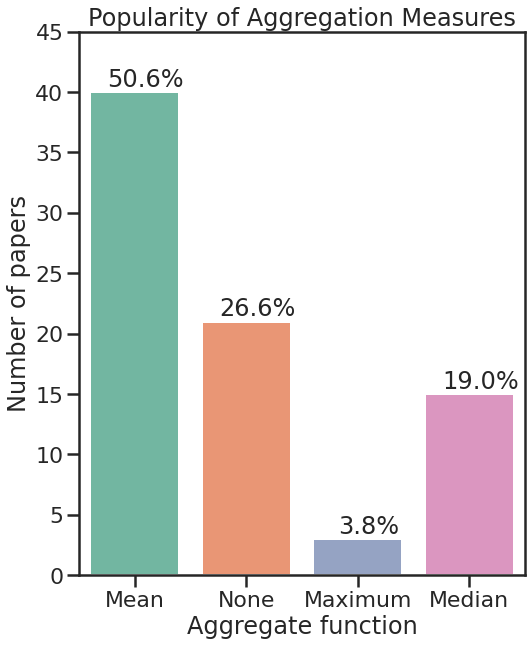

In [ ]:
# Aggregate functions (fine grained)
# code adapted from Gorsane et. al.
aggregate_data=df.copy()
aggregate_data.aggregate_function.fillna('None', inplace=True)
aggregate_data=(aggregate_data.groupby(['paper_title'])['aggregate_function']
                     .value_counts(normalize=True)
                     .rename('count')
                     .reset_index()
                     .sort_values('paper_title'))

# Label papers that dont report uncertainty methods as "none"
aggregate_data['measure']=False
for i in aggregate_data.index:
    if aggregate_data.aggregate_function[i]=='None' and len(aggregate_data[aggregate_data['paper_title']==aggregate_data.paper_title[i]].aggregate_function.unique())>1:
        aggregate_data['measure'][i]=True
aggregate_data.drop(aggregate_data[aggregate_data['measure']==True].index, inplace = True) 


plt.figure(figsize=(8,10))
p=sns.countplot(x='aggregate_function', data=aggregate_data)

# add percentages to plot.
total = len(aggregate_data)
for i in p.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/total)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    p.annotate(percentage, (x-0.3, y+0.5),ha='center')


plt.title('Popularity of Aggregation Measures')
plt.xlabel('Aggregate function');
plt.ylabel('Number of papers');
plt.tick_params(axis='both', which='major')
p.set(ylim=(0, 45));

In [ ]:
#plots the number of papers that use the different measures of spread
# code adapted from Gorsane et. al.
def uncertaintyMeasurementPopularity():
  '''This method plots how popular -by number of papers in the coop marl literature- all the uncertainty measures that are used are.'''
  uncertainty_data=df.copy()
  uncertainty_data.measure_of_spread.fillna('None', inplace=True)
  uncertainty_data=(uncertainty_data.groupby(['paper_title'])['measure_of_spread']
                      .value_counts(normalize=True)
                      .rename('count')
                      .reset_index()
                      .sort_values('paper_title'))

  # Label papers that dont report uncertainty methods as "none"
  uncertainty_data['measure']=False
  for i in uncertainty_data.index:
      if uncertainty_data.measure_of_spread[i]=='None' and len(uncertainty_data[uncertainty_data['paper_title']==uncertainty_data.paper_title[i]].measure_of_spread.unique())>1:
          uncertainty_data['measure'][i]=True
  uncertainty_data.drop(uncertainty_data[uncertainty_data['measure']==True].index, inplace = True) 

  # Shorten labels
  for i in uncertainty_data.index:
      if uncertainty_data.measure_of_spread[i]=='95% Confidence Interval':
          uncertainty_data.measure_of_spread[i]='95% CI'
      elif uncertainty_data.measure_of_spread[i]=='99.5% Confidence Interval':
          uncertainty_data.measure_of_spread[i]='99.5% CI'
      elif uncertainty_data.measure_of_spread[i]=='Standard Deviation':
          uncertainty_data.measure_of_spread[i]='STD'
      elif uncertainty_data.measure_of_spread[i]=='Inter-Quartile Range':
          uncertainty_data.measure_of_spread[i]='IQR'

  plt.figure(figsize=(8,10))
  p=sns.countplot(x='measure_of_spread', data=uncertainty_data)

  # add percentages to plot.
  total = len(uncertainty_data)
  for i in p.patches:
      percentage = '{:.1f}%'.format(100 * i.get_height()/total)
      x = i.get_x() + i.get_width()
      y = i.get_height()
      p.annotate(percentage, (x-0.3, y+0.3),ha='center')
  
  #make plots
  plt.title('Uncertainty Method Popularity')
  plt.xlabel('Uncertainty Measure');
  plt.ylabel('Number of papers');
  plt.tick_params(axis='both', which='major');


<ipython-input-61-53b7253ea9ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncertainty_data['measure'][i]=True
<ipython-input-61-53b7253ea9ee>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncertainty_data.measure_of_spread[i]='STD'
<ipython-input-61-53b7253ea9ee>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncertainty_data.measure_of_spread[i]='95% CI'
<ipython-input-61-53b7253ea9ee>:29: SettingWithCopyWarning: 
A val

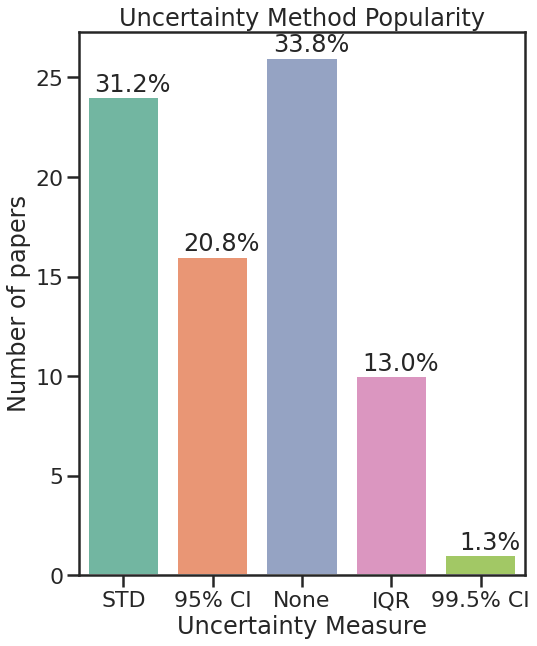

In [ ]:
uncertaintyMeasurementPopularity()

In [ ]:
# plots the metrics used to aggregate across tasks.
# Code adapted from Gorsane et. al.
def metricPopularity():
  '''This method plots the popularity -by number of paper in the coop marl literature- of the various metrics used to report algorithm performances.'''
  # count the metric only once per paper
  env_data=(df.groupby(['paper_title'])['metric']
                     .value_counts(normalize=True)
                     .rename('count')
                     .reset_index())
  
  plt.figure(figsize=(15,8))
  p=sns.countplot(x='metric',data=env_data)
  
  # make plot
  plt.setp(p.get_xticklabels(), rotation=90)
  plt.title("Popularity of Reported Performance Metrics")
  plt.xlabel('Metric')
  plt.ylabel('Number_papers')

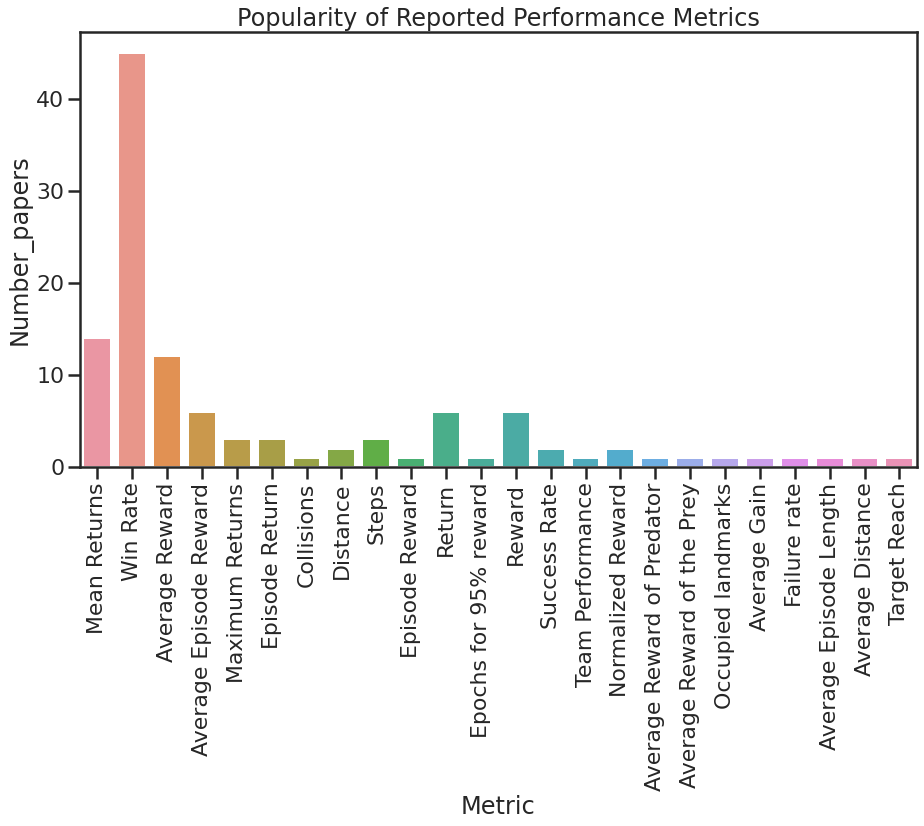

In [ ]:
metricPopularity()

<ipython-input-15-577ff9582400>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k.runs[index]=k.runs_per_seed[index]


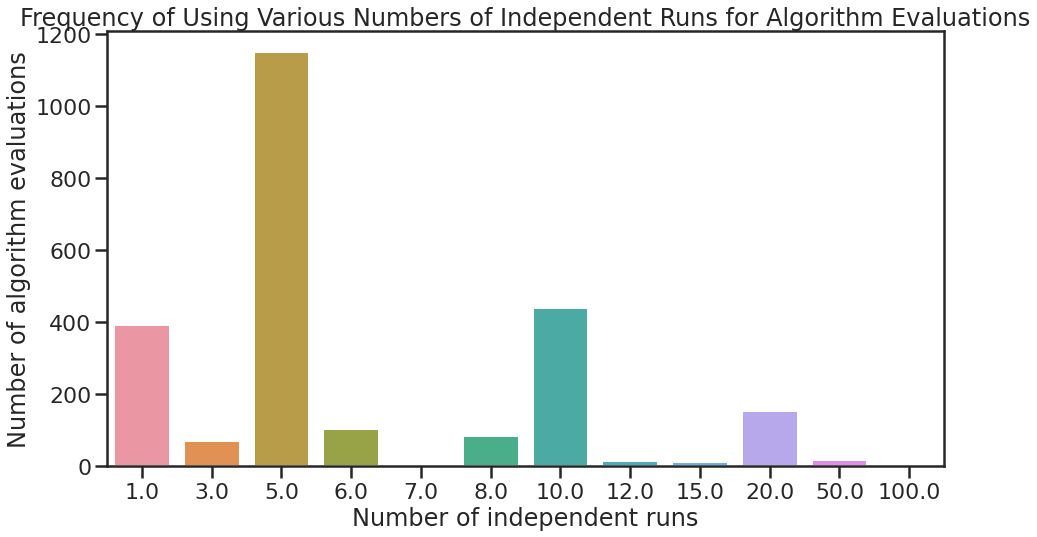

In [ ]:
# How many independent runs does each reported algorithm evaluation use
# Code adapted from Gorsane et. al.
runs_data=df.copy()
runs_data['runs']=runs_data['number_seeds']
k=runs_data.copy()
for index in k.index:
    if not pd.isna(k.runs_per_seed[index]):
        if k.runs_per_seed[index]>1:
            k.runs[index]=k.runs_per_seed[index]

#make plot
plt.figure(figsize=(15,8))
p=sns.countplot(x='runs', data=runs_data)
plt.title("Frequency of Using Various Numbers of Independent Runs for Algorithm Evaluations");
plt.xlabel('Number of independent runs');
plt.ylabel('Number of algorithm evaluations');
plt.tick_params(axis='both', which='major')

In [ ]:
#check
# k=df.copy()
# k['runs']=k['number_seeds']
# for index in k.index:
#     if not pd.isna(k.runs_per_seed[index]):
#       if k.runs_per_seed[index]>1:
#         if k.runs[index]>1:
#             print(True,"")